# Overfitting in ANN

- Overfits the training data and performs poorly on the test data.
- When the model has high accuracy whe predicting the training data but low accuracy when predicting the test data.
- ANN's has the tendency to overfit the training data, when the model is too complex.

## Solutions:
1. Simpler model (reduce the number of layers or neurons aka nodes)
2. Decrease epochs and batch size
3. Increase data size and variety
4. Regularization
5. Dropout
6. Decrease learning rate 

# Regularization

- Controls overfitting during model training
- An adjustment to the model parameters  to prevent them overfitting the training data.
- Reduce variance in the model by adding a penalty term to the loss function.
- Multiple types of regularization techniques: 
- - L1 Regularization
- - L2 Regularization
- - L1_L2 aka Elastic Net

In [8]:
from src.utils import base_model_config, get_data, create_and_run_model, plot_graph
from tensorflow.keras.regularizers import l1, l2, l1_l2

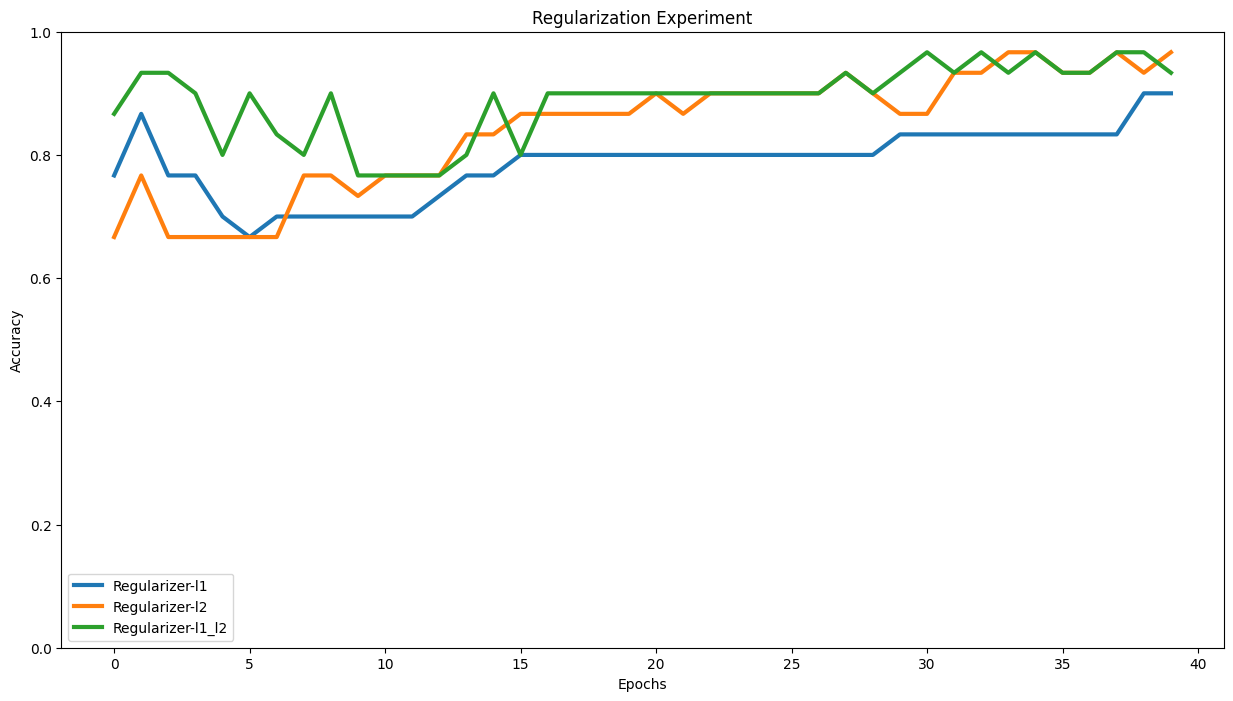

In [11]:
# Regularization Experiment

accuracy_measures = {}

regularizer_list = [l1(0.01), l2(0.01), l1_l2(l1=0.01, l2=0.01)]
regularizer_names = ['l1', 'l2', 'l1_l2']
for regularizer, reg_name in zip(regularizer_list, regularizer_names):
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["REGULARIZER"] = regularizer
    model_config["EPOCHS"] = 40
    model_name = "Regularizer-" + reg_name
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Switch to validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]

plot_graph(accuracy_measures, 'Regularization Experiment')

# Regularization Experiment Results

1. Elastic Net (l1_l2) regularization has the best performance at early epochs (max epochs = 30).
2. L2 regularization has the best performance at later epochs (max epochs = 35).
3. L1 has hard time converging to the optimal solution (max epochs = 40-50).

# Dropout Regularization

1. Dropping out nodes randomly during forward propagation
2. A given percent of nodes are dropped randomly
3. Choose values that provide similar accuracy for both training and test data

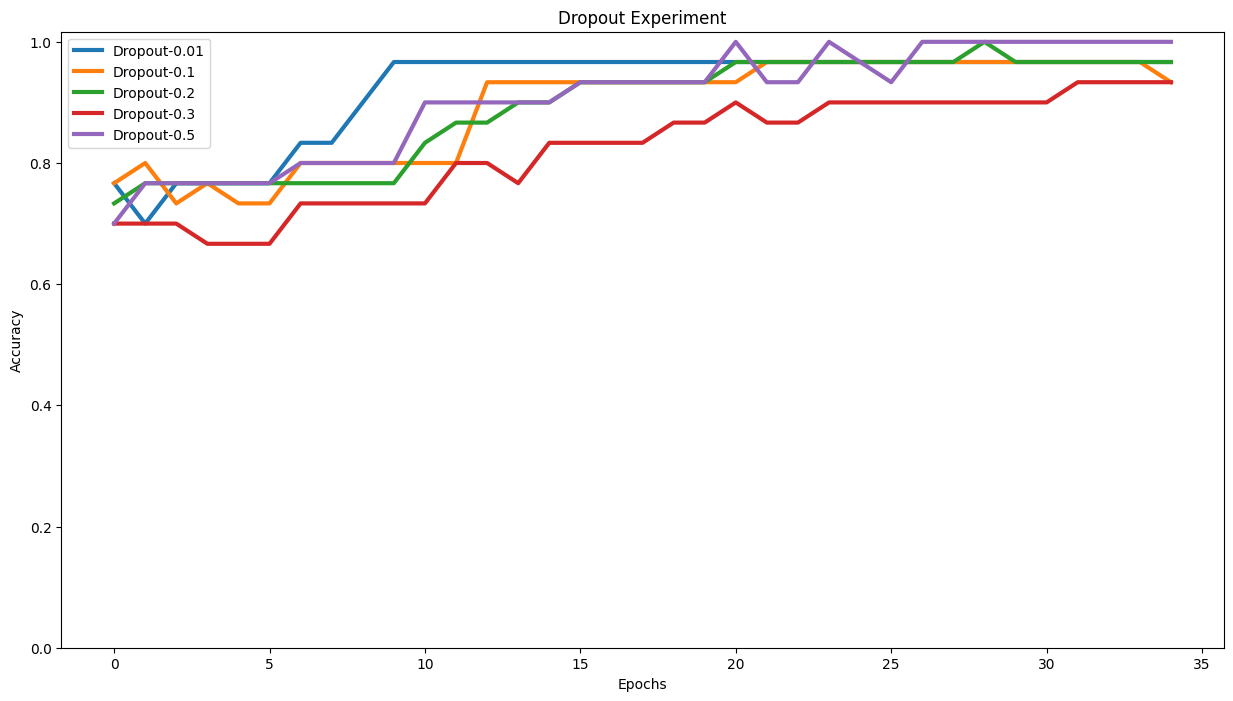

In [13]:
# Dropout Experiment

accuracy_measures = {}

dropout_list = [0.01, 0.1, 0.2, 0.3, 0.5]
for dropout in dropout_list:
    model_config = base_model_config()
    X, Y = get_data()

    model_config["DROPOUT_RATE"] = dropout
    model_config["EPOCHS"] = 35
    model_name = "Dropout-" + str(dropout)
    history = create_and_run_model(model_config, X, Y, model_name)

    # Using validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]
    
plot_graph(accuracy_measures, 'Dropout Experiment')

### Dropout Experiment Results
1. Dropout value 0.01 has the best performance at early epochs (max epochs = 10) but stop increasing.
2. Dropout value 0.1 has the best performance at later epochs (max epochs = 20).
3. Dropout value 0.2 has the best performance at later epochs (max epochs = 25).
4. Dropout value 0.3 has poor performance at early epochs but improves at later epochs (max epochs > 35).
5. Dropout value 0.5 has the best performance (max epochs = 20)